<a href="https://colab.research.google.com/github/Anushka-dev707/Air-Quality-Index-Prediction/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIR QUALITY INDEX PREDICTION


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Upload File
from google.colab import files
uploaded = files.upload()

# Read Excel file
df = pd.read_csv("AirQualityUCI.csv")   # change name if needed
df


Saving AirQualityUCI.csv to AirQualityUCI.csv


Date      Time  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0     11/23/2004  19:00:00   11.9        2008     -200     50.6          1980   
1     11/23/2004  20:00:00   11.5        1918     -200     49.4          1958   
2     11/17/2004  18:00:00   10.2        1802     -200     47.7          1924   
3     11/23/2004  18:00:00   10.2        1982     -200     49.5          1959   
4     11/26/2004  18:00:00   10.1        1956     -200     45.2          1877   
...          ...       ...    ...         ...      ...      ...           ...   
9352   3/23/2005  04:00:00 -200.0         993     -200      2.3           604   
9353   3/26/2005  04:00:00 -200.0        1122     -200      6.0           811   
9354   3/29/2005  04:00:00 -200.0         883     -200      1.3           530   
9355  04-01-2005  04:00:00 -200.0         818     -200      0.8           473   
9356  04-04-2005  04:00:00 -200.0         864     -200      0.8           478   

      Nox_GT  PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH  \
0       1389          325     220         2562        2342  12.4  74.7   
1       1358          335     190         2477        2237  11.5  76.2   
2        748          356     192         2235        2452  13.7  52.8   
3       1369          322     227         2536        2386  13.2  72.6   
4       1389          347     255         2338        2465  15.5  62.8   
...      ...          ...     ...          ...         ...   ...   ...   
9352      85          848      65         1160         762  14.5  66.4   
9353     181          641      92         1336        1122  16.2  71.2   
9354      63          997      46         1102         617  13.7  68.2   
9355      47         1257      41          898         323  13.7  48.8   
9356      52         1116      43          958         489  11.8  56.0   

          AH   CO_level  
0     1.0741  Very High  
1     1.0324  Very High  
2     0.8244  Very High  
3     1.0936  Very High  
4     1.0979  Very High  
...      ...        ...  
9352  1.0919   Very low  
9353  1.3013   Very low  
9354  1.0611   Very low  
9355  0.7606   Very low  
9356  0.7743   Very low  

[9357 rows x 16 columns]

In [7]:
df.head()

Date      Time  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0  11/23/2004  19:00:00   11.9        2008     -200     50.6          1980   
1  11/23/2004  20:00:00   11.5        1918     -200     49.4          1958   
2  11/17/2004  18:00:00   10.2        1802     -200     47.7          1924   
3  11/23/2004  18:00:00   10.2        1982     -200     49.5          1959   
4  11/26/2004  18:00:00   10.1        1956     -200     45.2          1877   

   Nox_GT  PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0    1389          325     220         2562        2342  12.4  74.7  1.0741   
1    1358          335     190         2477        2237  11.5  76.2  1.0324   
2     748          356     192         2235        2452  13.7  52.8  0.8244   
3    1369          322     227         2536        2386  13.2  72.6  1.0936   
4    1389          347     255         2338        2465  15.5  62.8  1.0979   

    CO_level  
0  Very High  
1  Very High  
2  Very High  
3  Very High  
4  Very High

In [8]:
df.tail()

Date      Time  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
9352   3/23/2005  04:00:00 -200.0         993     -200      2.3           604   
9353   3/26/2005  04:00:00 -200.0        1122     -200      6.0           811   
9354   3/29/2005  04:00:00 -200.0         883     -200      1.3           530   
9355  04-01-2005  04:00:00 -200.0         818     -200      0.8           473   
9356  04-04-2005  04:00:00 -200.0         864     -200      0.8           478   

      Nox_GT  PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH  \
9352      85          848      65         1160         762  14.5  66.4   
9353     181          641      92         1336        1122  16.2  71.2   
9354      63          997      46         1102         617  13.7  68.2   
9355      47         1257      41          898         323  13.7  48.8   
9356      52         1116      43          958         489  11.8  56.0   

          AH  CO_level  
9352  1.0919  Very low  
9353  1.3013  Very low  
9354  1.0611  Very low  
9355  0.7606  Very low  
9356  0.7743  Very low

In [9]:
df.describe()

CO_GT   PT08_S1_CO      NMHC_GT      C6H6_GT  PT08_S2_NMHC  \
count  9357.000000  9357.000000  9357.000000  9357.000000   9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683    894.595276   
std      77.657170   329.832710   139.789093    41.380206    342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000   -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000    711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000    895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000   1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000   2214.000000   

            Nox_GT  PT08_S3_Nox       NO2_GT  PT08_S4_NO2   PT08_S5_O3  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    168.616971   794.990168    58.148873  1391.479641   975.072032   
std     257.433866   321.993552   126.940455   467.210125   456.938184   
min    -200.000000  -200.000000  -200.000000  -200.000000  -200.000000   
25%      50.000000   637.000000    53.000000  1185.000000   700.000000   
50%     141.000000   794.000000    96.000000  1446.000000   942.000000   
75%     284.000000   960.000000   133.000000  1662.000000  1255.000000   
max    1479.000000  2683.000000   340.000000  2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [10]:
#seeing the information of our dataset.....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
#number of rows and columns...
df.shape

(9357, 16)

In [12]:
#to see columns
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

In [13]:
df.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [14]:
df['NMHC_GT'].value_counts()

NMHC_GT
-200    8443
 66       14
 40        9
 29        9
 88        8
        ... 
 685       1
 22        1
 9         1
 618       1
 10        1
Name: count, Length: 430, dtype: int64

In [15]:
df.drop('NMHC_GT',axis=1,inplace=True)

In [16]:
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC',
       'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T',
       'RH', 'AH', 'CO_level'],
      dtype='object')

In [17]:
df.shape

(9357, 15)

In [18]:
df['CO_GT'].value_counts()

CO_GT
-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.5         1
 9.9         1
 10.1        1
 11.5        1
 8.5         1
Name: count, Length: 97, dtype: int64

In [20]:
df=df.replace(to_replace=-200,value=np.nan)
df

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0     11/23/2004  19:00:00   11.9      2008.0     50.6        1980.0  1389.0   
1     11/23/2004  20:00:00   11.5      1918.0     49.4        1958.0  1358.0   
2     11/17/2004  18:00:00   10.2      1802.0     47.7        1924.0   748.0   
3     11/23/2004  18:00:00   10.2      1982.0     49.5        1959.0  1369.0   
4     11/26/2004  18:00:00   10.1      1956.0     45.2        1877.0  1389.0   
...          ...       ...    ...         ...      ...           ...     ...   
9352   3/23/2005  04:00:00    NaN       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00    NaN      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00    NaN       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00    NaN       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00    NaN       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741   
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324   
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244   
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936   
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979   
...           ...     ...          ...         ...   ...   ...     ...   
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

       CO_level  
0     Very High  
1     Very High  
2     Very High  
3     Very High  
4     Very High  
...         ...  
9352   Very low  
9353   Very low  
9354   Very low  
9355   Very low  
9356   Very low  

[9357 rows x 15 columns]

In [21]:
df.isnull().sum()

Date               0
Time               0
CO_GT           1683
PT08_S1_CO       366
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

In [29]:
df.head()

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0  11/23/2004  19:00:00   11.9      2008.0     50.6        1980.0  1389.0   
1  11/23/2004  20:00:00   11.5      1918.0     49.4        1958.0  1358.0   
2  11/17/2004  18:00:00   10.2      1802.0     47.7        1924.0   748.0   
3  11/23/2004  18:00:00   10.2      1982.0     49.5        1959.0  1369.0   
4  11/26/2004  18:00:00   10.1      1956.0     45.2        1877.0  1389.0   

   PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH   CO_level  
0        325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741  Very High  
1        335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324  Very High  
2        356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244  Very High  
3        322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936  Very High  
4        347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979  Very High

In [30]:
df.tail()

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
9352   3/23/2005  04:00:00    NaN       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00    NaN      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00    NaN       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00    NaN       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00    NaN       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

      CO_level  
9352  Very low  
9353  Very low  
9354  Very low  
9355  Very low  
9356  Very low

In [31]:
df.mean
df

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0     11/23/2004  19:00:00   11.9      2008.0     50.6        1980.0  1389.0   
1     11/23/2004  20:00:00   11.5      1918.0     49.4        1958.0  1358.0   
2     11/17/2004  18:00:00   10.2      1802.0     47.7        1924.0   748.0   
3     11/23/2004  18:00:00   10.2      1982.0     49.5        1959.0  1369.0   
4     11/26/2004  18:00:00   10.1      1956.0     45.2        1877.0  1389.0   
...          ...       ...    ...         ...      ...           ...     ...   
9352   3/23/2005  04:00:00    NaN       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00    NaN      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00    NaN       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00    NaN       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00    NaN       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741   
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324   
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244   
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936   
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979   
...           ...     ...          ...         ...   ...   ...     ...   
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

       CO_level  
0     Very High  
1     Very High  
2     Very High  
3     Very High  
4     Very High  
...         ...  
9352   Very low  
9353   Very low  
9354   Very low  
9355   Very low  
9356   Very low  

[9357 rows x 15 columns]

In [32]:
df['CO_GT'] = df['CO_GT'].fillna(-200)


In [33]:
df.tail()


Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
9352   3/23/2005  04:00:00 -200.0       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00 -200.0      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00 -200.0       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00 -200.0       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

      CO_level  
9352  Very low  
9353  Very low  
9354  Very low  
9355  Very low  
9356  Very low

In [34]:
df

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0     11/23/2004  19:00:00   11.9      2008.0     50.6        1980.0  1389.0   
1     11/23/2004  20:00:00   11.5      1918.0     49.4        1958.0  1358.0   
2     11/17/2004  18:00:00   10.2      1802.0     47.7        1924.0   748.0   
3     11/23/2004  18:00:00   10.2      1982.0     49.5        1959.0  1369.0   
4     11/26/2004  18:00:00   10.1      1956.0     45.2        1877.0  1389.0   
...          ...       ...    ...         ...      ...           ...     ...   
9352   3/23/2005  04:00:00 -200.0       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00 -200.0      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00 -200.0       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00 -200.0       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741   
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324   
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244   
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936   
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979   
...           ...     ...          ...         ...   ...   ...     ...   
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

       CO_level  
0     Very High  
1     Very High  
2     Very High  
3     Very High  
4     Very High  
...         ...  
9352   Very low  
9353   Very low  
9354   Very low  
9355   Very low  
9356   Very low  

[9357 rows x 15 columns]

In [35]:
df.isnull().sum()

Date               0
Time               0
CO_GT              0
PT08_S1_CO       366
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

In [36]:
df.tail()

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
9352   3/23/2005  04:00:00 -200.0       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00 -200.0      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00 -200.0       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00 -200.0       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

      CO_level  
9352  Very low  
9353  Very low  
9354  Very low  
9355  Very low  
9356  Very low

In [37]:
df.head()

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0  11/23/2004  19:00:00   11.9      2008.0     50.6        1980.0  1389.0   
1  11/23/2004  20:00:00   11.5      1918.0     49.4        1958.0  1358.0   
2  11/17/2004  18:00:00   10.2      1802.0     47.7        1924.0   748.0   
3  11/23/2004  18:00:00   10.2      1982.0     49.5        1959.0  1369.0   
4  11/26/2004  18:00:00   10.1      1956.0     45.2        1877.0  1389.0   

   PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH   CO_level  
0        325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741  Very High  
1        335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324  Very High  
2        356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244  Very High  
3        322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936  Very High  
4        347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979  Very High

In [38]:
df['CO_level'].unique()

array(['Very High', 'High', 'Moderate', 'Low', 'Very low'], dtype=object)

In [39]:
df['CO_level'].value_counts()

CO_level
High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: count, dtype: int64

<Axes: xlabel='CO_level', ylabel='Count'>

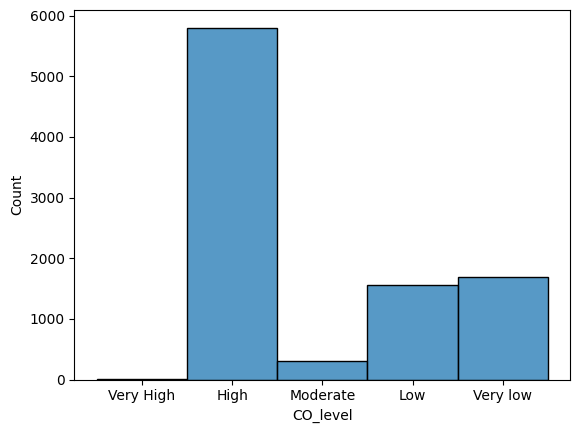

In [40]:
import seaborn as sns
sns.histplot(df['CO_level'])

In [41]:
df.nunique()

Date             391
Time              24
CO_GT             97
PT08_S1_CO      1041
C6H6_GT          407
PT08_S2_NMHC    1245
Nox_GT           925
PT08_S3_Nox     1221
NO2_GT           283
PT08_S4_NO2     1603
PT08_S5_O3      1743
T                436
RH               753
AH              6683
CO_level           5
dtype: int64

In [42]:
df['Time'].unique()

array(['19:00:00', '20:00:00', '18:00:00', '21:00:00', '17:00:00',
       '09:00:00', '14:00:00', '08:00:00', '16:00:00', '13:00:00',
       '10:00:00', '11:00:00', '15:00:00', '12:00:00', '00:00:00',
       '07:00:00', '01:00:00', '02:00:00', '23:00:00', '22:00:00',
       '03:00:00', '06:00:00', '05:00:00', '04:00:00'], dtype=object)

In [47]:
df[(df['Time'] == '04:00:00') & (df['CO_level'] == 'High')]


Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
2060   2/13/2005  04:00:00    2.8      1515.0     12.5        1066.0   345.0   
2518  02-02-2005  04:00:00    2.5      1058.0      4.8         753.0   210.0   
2649  11/27/2004  04:00:00    2.4      1250.0      9.1         942.0   319.0   
2666  12/24/2004  04:00:00    2.4      1200.0      8.7         929.0   288.0   
3033  11/25/2004  04:00:00    2.2      1050.0      9.4         956.0   456.0   
3043  12/17/2004  04:00:00    2.2         NaN      NaN           NaN   433.0   
3251  12-12-2004  04:00:00    2.1      1091.0      9.8         971.0   273.0   
3499  01-05-2005  04:00:00    2.0      1219.0      7.7         889.0   260.0   
3514  02-05-2005  04:00:00    2.0      1084.0      7.0         859.0   272.0   
3722  01-01-2005  04:00:00    1.9      1054.0      5.6         791.0   253.0   
4141  12-08-2004  04:00:00    1.7      1080.0      7.9         896.0   212.0   
4178   1/16/2005  04:00:00    1.7      1003.0      5.9         807.0   219.0   
4203   2/26/2005  04:00:00    1.7      1037.0      5.2         771.0   233.0   
4457  02-11-2005  04:00:00    1.6         NaN      NaN           NaN   107.0   
4669  11/29/2004  04:00:00    1.5       993.0      4.2         720.0   156.0   
4727   2/20/2005  04:00:00    1.5      1067.0      4.9         758.0   177.0   
4932  11/24/2004  04:00:00    1.4      1023.0      5.4         781.0   295.0   
4990  02-10-2005  04:00:00    1.4         NaN      NaN           NaN    95.0   
5061   3/28/2004  04:00:00    1.3      1010.0      5.1         769.0    77.0   
5207  11/13/2004  04:00:00    1.3      1006.0      5.0         765.0   174.0   
5228  12/23/2004  04:00:00    1.3       874.0      3.1         657.0   129.0   
5233  01-02-2005  04:00:00    1.3       947.0      3.3         673.0   148.0   
5469  11/18/2004  04:00:00    1.2       893.0      3.8         701.0   185.0   
5491  01-08-2005  04:00:00    1.2       972.0      3.4         674.0   169.0   
5659  09-05-2004  04:00:00    1.1       929.0      5.1         769.0     NaN   
5686  11-11-2004  04:00:00    1.1       930.0      5.4         784.0   174.0   
5693  11/19/2004  04:00:00    1.1       888.0      2.1         590.0    51.0   
5700  12-03-2004  04:00:00    1.1       986.0      3.8         700.0   133.0   
5724   1/13/2005  04:00:00    1.1       915.0      3.7         695.0   192.0   
5725   1/14/2005  04:00:00    1.1       981.0      4.2         721.0   103.0   
5761   2/16/2005  04:00:00    1.1      1052.0      4.5         740.0   237.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
2060        508.0   140.0       1430.0      1548.0   8.9  81.3  0.9277   
2518        764.0   121.0        986.0      1149.0   3.3  66.8  0.5215   
2649        755.0   103.0       1323.0      1380.0  11.9  80.7  1.1199   
2666        664.0   132.0       1082.0      1847.0   4.2  63.1  0.5259   
3033        725.0    89.0       1162.0      1025.0   4.3  85.4  0.7152   
3043          NaN   119.0          NaN         NaN   NaN   NaN     NaN   
3251        703.0   102.0       1148.0      1187.0   5.4  64.1  0.5772   
3499        649.0   111.0       1186.0      1405.0   7.9  72.1  0.7679   
3514        703.0   164.0       1017.0      1163.0   1.5  66.2  0.4571   
3722        830.0   126.0        967.0      1131.0   4.3  55.3  0.4650   
4141       1075.0    75.0       1262.0      1033.0  11.6  72.5  0.9916   
4178        819.0   115.0       1021.0      1005.0   3.7  68.9  0.5549   
4203        784.0   122.0       1004.0      1029.0   2.3  75.1  0.5514   
4457          NaN    91.0          NaN         NaN   NaN   NaN     NaN   
4669        891.0    66.0       1143.0       925.0   8.9  83.0  0.9487   
4727        775.0   130.0        993.0      1009.0   8.2  46.9  0.5099   
4932        809.0    81.0       1195.0      1019.0  10.6  78.8  1.0080   
4990          NaN    87.0          NaN         NaN   NaN   NaN     NaN   
5061       1110.0    69.0       1396.0       

In [48]:
df[(df['Time']=='06:00:00')&(df['CO_level']=="High")]

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
1251  12/24/2004  06:00:00    3.5      1166.0      8.2         909.0   351.0   
2379   2/13/2005  06:00:00    2.6      1453.0     10.9        1012.0   324.0   
3064  02-02-2005  06:00:00    2.2      1069.0      4.5         737.0   257.0   
3354   4/16/2004  06:00:00    2.0      1242.0     10.0         978.0   180.0   
3471  11/25/2004  06:00:00    2.0      1016.0      9.1         945.0   498.0   
...          ...       ...    ...         ...      ...           ...     ...   
5709  12/14/2004  06:00:00    1.1       964.0      5.4         784.0   282.0   
5748  02-01-2005  06:00:00    1.1      1024.0      4.2         724.0   241.0   
5783  03-04-2005  06:00:00    1.1      1023.0      3.6         690.0   210.0   
5785  03-05-2005  06:00:00    1.1       993.0      4.3         727.0   194.0   
5812  04-04-2005  06:00:00    1.1      1031.0      4.4         730.0   182.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
1251        691.0   136.0       1079.0      1680.0   4.8  61.9  0.5370   
2379        534.0   150.0       1348.0      1441.0   8.3  84.0  0.9234   
3064        792.0   125.0        946.0      1114.0   2.6  67.5  0.5034   
3354        778.0    87.0       1686.0      1184.0  11.7  75.3  1.0325   
3471        724.0    93.0       1147.0      1038.0   4.0  84.4  0.6943   
...           ...     ...          ...         ...   ...   ...     ...   
5709        824.0    92.0       1080.0       959.0   6.0  77.3  0.7262   
5748        814.0   122.0        944.0      1198.0   2.0  64.9  0.4661   
5783        833.0   117.0       1049.0      1006.0   3.7  76.4  0.6164   
5785        810.0   128.0        989.0      1001.0   3.1  68.6  0.5302   
5812        760.0    93.0       1129.0       905.0   9.5  63.1  0.7531   

     CO_level  
1251     High  
2379     High  
3064     High  
3354     High  
3471     High  
...       ...  
5709     High  
5748     High  
5783     High  
5785     High  
5812     High  

[102 rows x 15 columns]

<Axes: xlabel='CO_GT', ylabel='Time'>

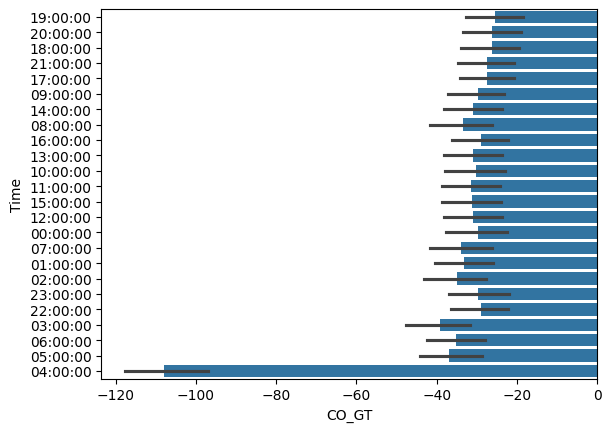

In [49]:
sns.barplot(x='CO_GT',y='Time',data=df)

<Axes: xlabel='PT08_S1_CO', ylabel='Time'>

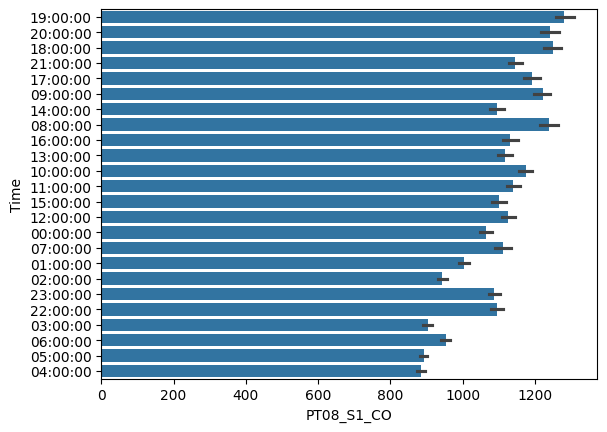

In [50]:
sns.barplot(x='PT08_S1_CO',y='Time',data=df)

<Axes: xlabel='CO_GT', ylabel='PT08_S1_CO'>

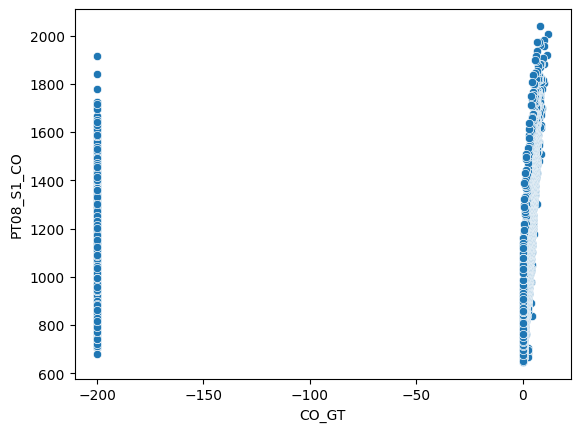

In [51]:
sns.scatterplot(x='CO_GT',y='PT08_S1_CO',data=df)

<Axes: xlabel='C6H6_GT', ylabel='PT08_S1_CO'>

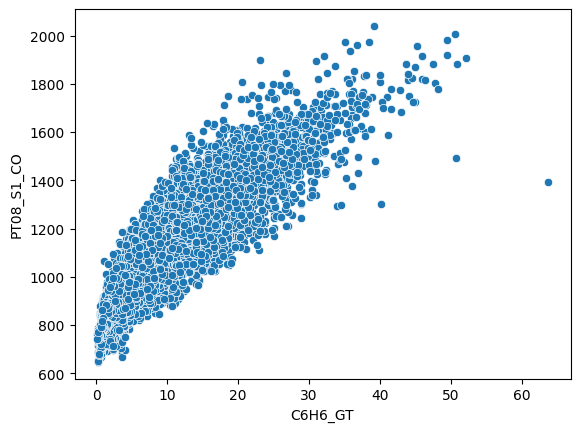

In [52]:
sns.scatterplot(x='C6H6_GT',y='PT08_S1_CO',data=df)

<Axes: xlabel='NO2_GT', ylabel='Nox_GT'>

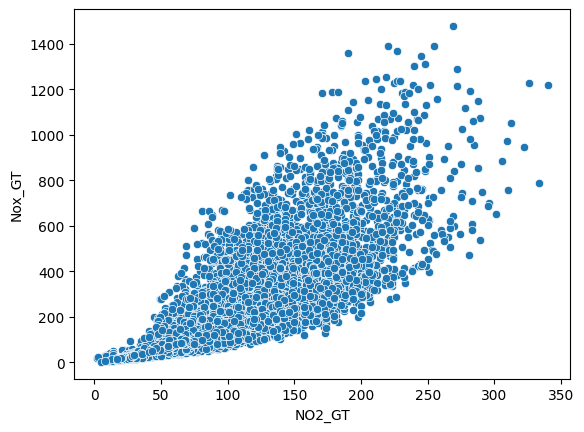

In [53]:
sns.scatterplot(x='NO2_GT',y='Nox_GT',data=df)

<Axes: xlabel='PT08_S4_NO2', ylabel='PT08_S5_O3'>

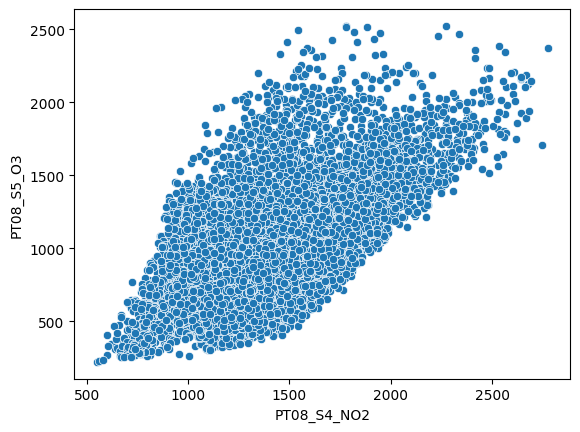

In [54]:
sns.scatterplot(x='PT08_S4_NO2',y='PT08_S5_O3',data=df)

<Axes: ylabel='Count'>

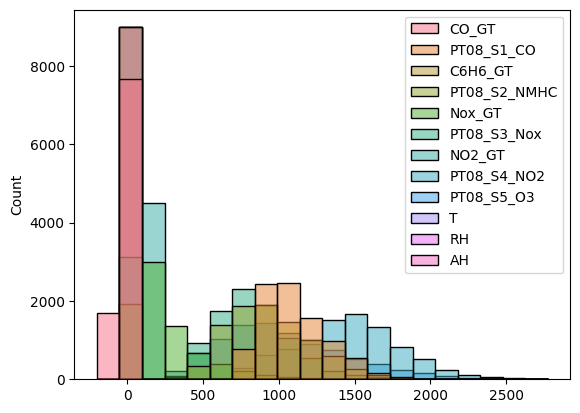

In [55]:
sns.histplot(bins=20,data=df)

In [56]:
df.replace([np.inf,-np.inf],np.nan)

Date      Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0     11/23/2004  19:00:00   11.9      2008.0     50.6        1980.0  1389.0   
1     11/23/2004  20:00:00   11.5      1918.0     49.4        1958.0  1358.0   
2     11/17/2004  18:00:00   10.2      1802.0     47.7        1924.0   748.0   
3     11/23/2004  18:00:00   10.2      1982.0     49.5        1959.0  1369.0   
4     11/26/2004  18:00:00   10.1      1956.0     45.2        1877.0  1389.0   
...          ...       ...    ...         ...      ...           ...     ...   
9352   3/23/2005  04:00:00 -200.0       993.0      2.3         604.0    85.0   
9353   3/26/2005  04:00:00 -200.0      1122.0      6.0         811.0   181.0   
9354   3/29/2005  04:00:00 -200.0       883.0      1.3         530.0    63.0   
9355  04-01-2005  04:00:00 -200.0       818.0      0.8         473.0    47.0   
9356  04-04-2005  04:00:00 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741   
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324   
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244   
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936   
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979   
...           ...     ...          ...         ...   ...   ...     ...   
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

       CO_level  
0     Very High  
1     Very High  
2     Very High  
3     Very High  
4     Very High  
...         ...  
9352   Very low  
9353   Very low  
9354   Very low  
9355   Very low  
9356   Very low  

[9357 rows x 15 columns]

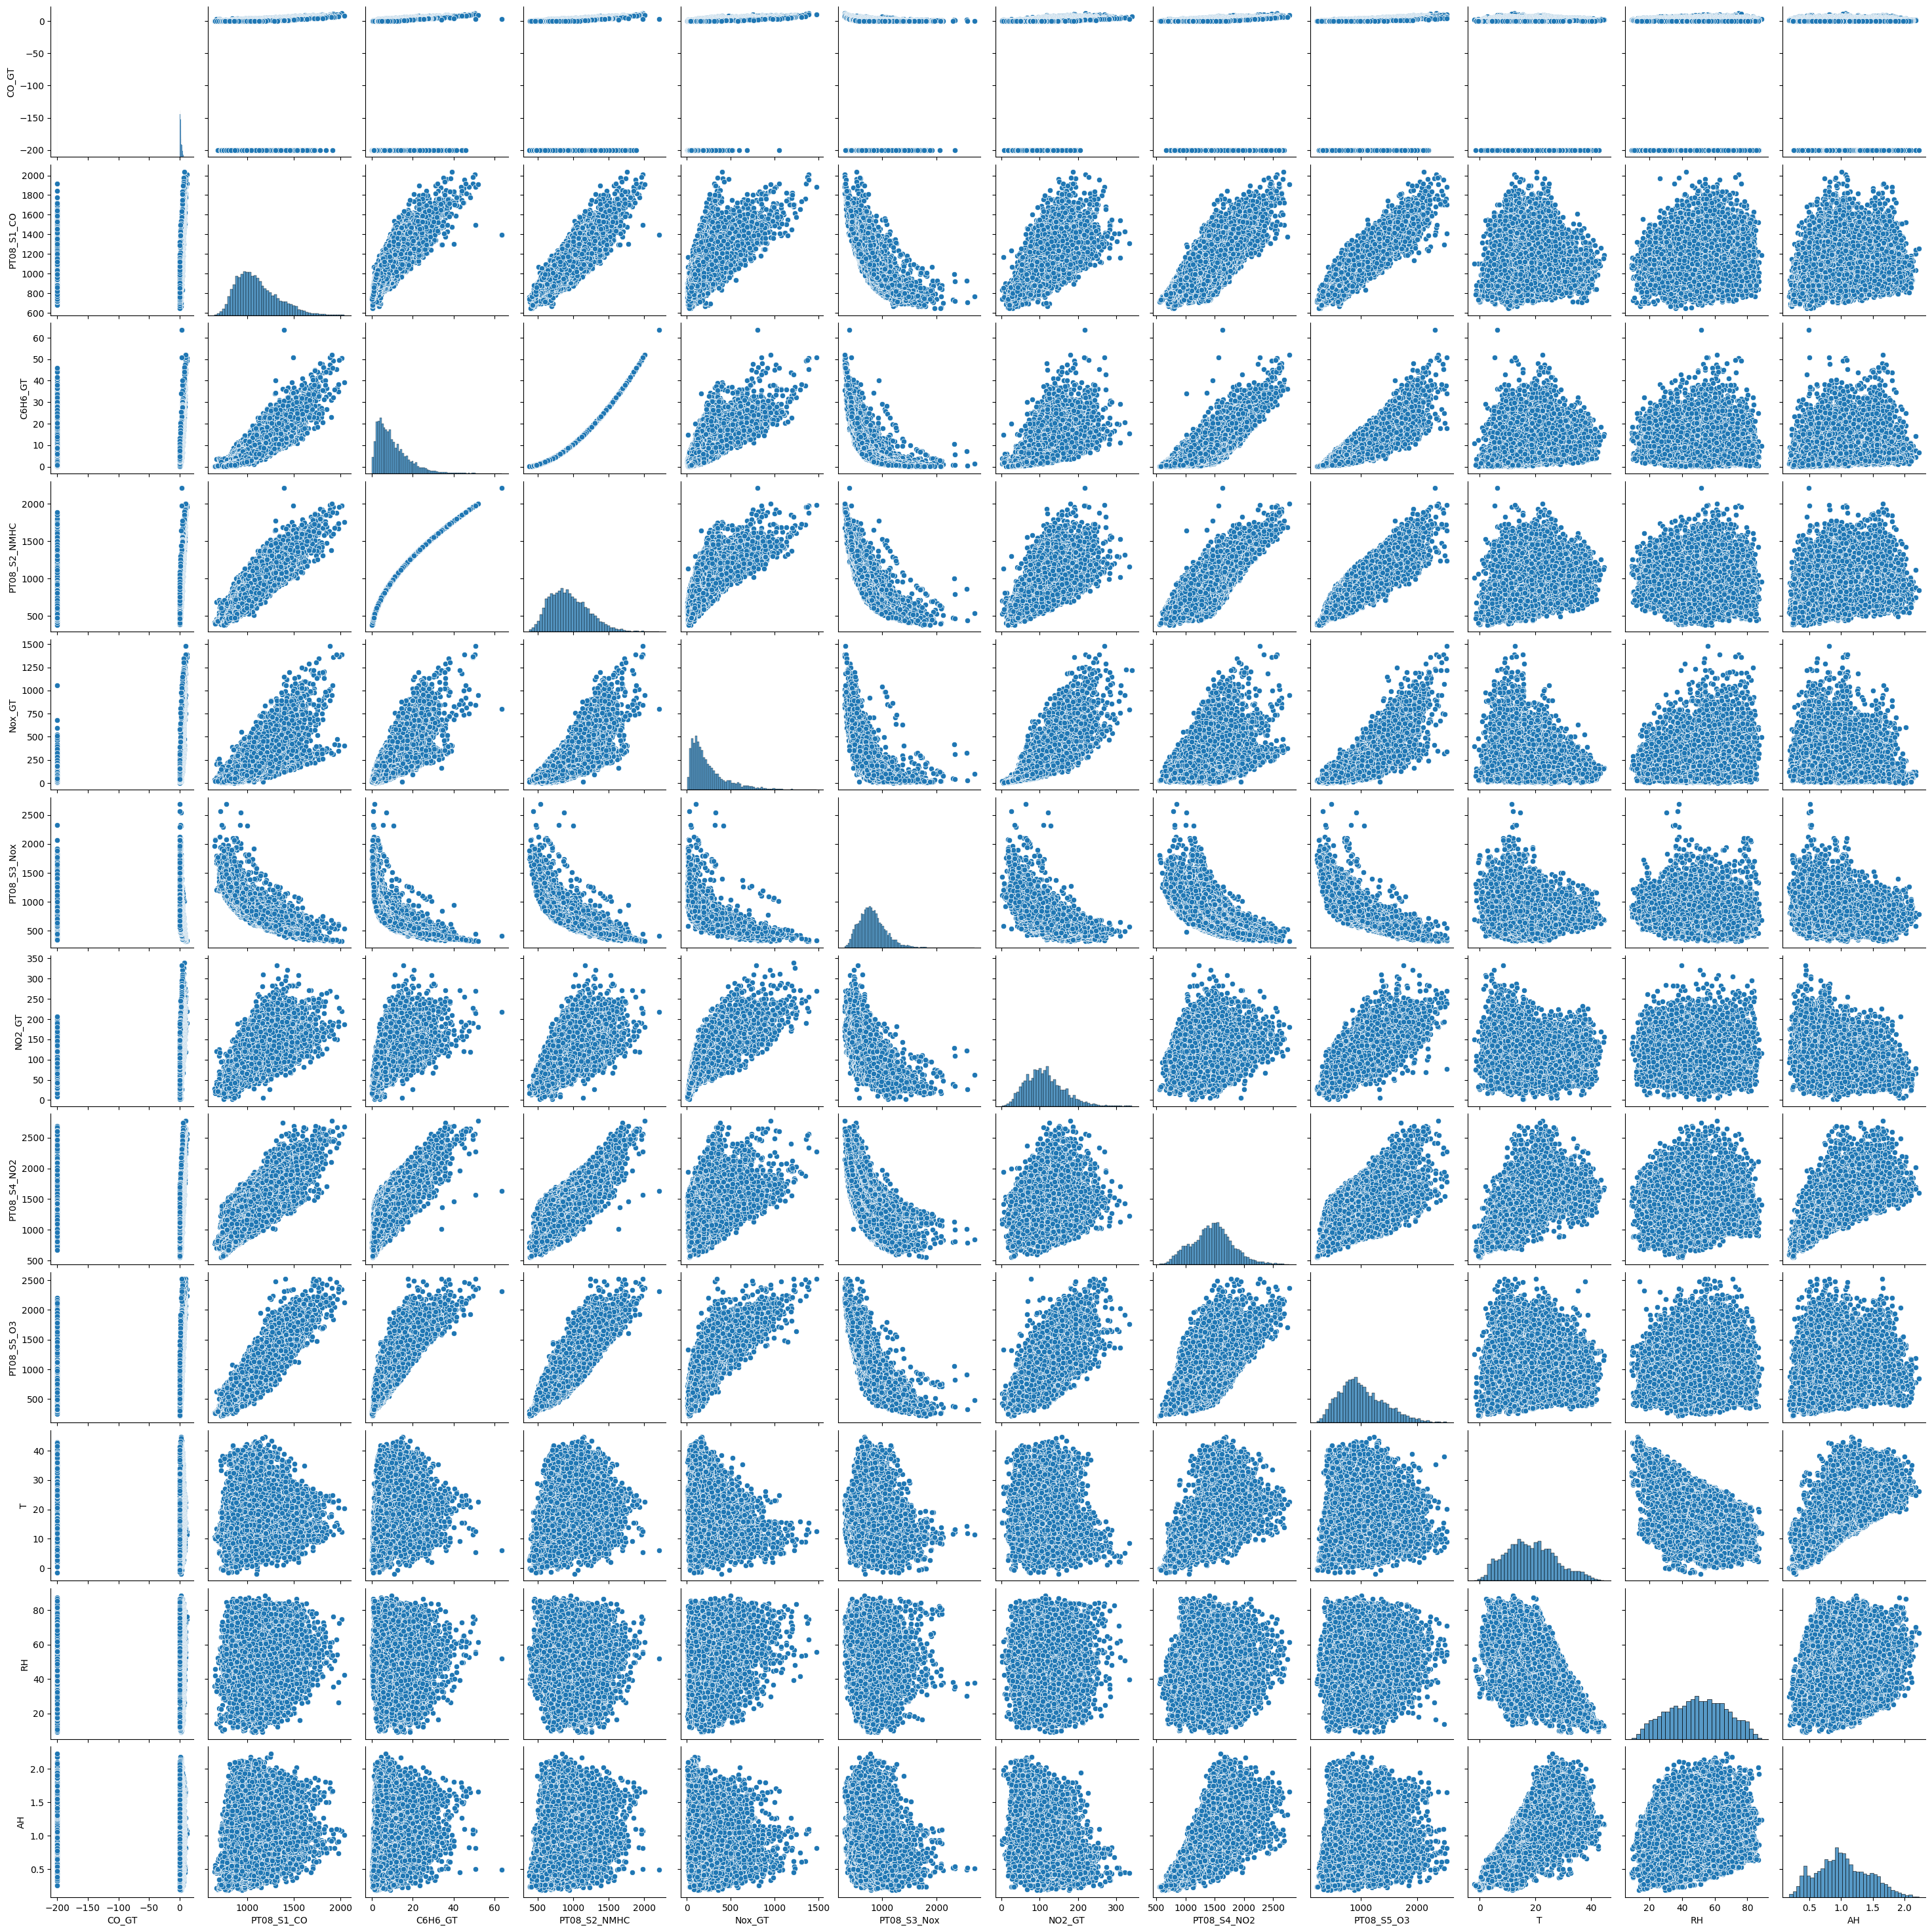

In [57]:
#visualisation of pairplots
sns.pairplot(df)
plt.show()

In [58]:
#Applying Encoding to few columns:- to convert categorial values of relevent features to numerical ones.........
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Time']=le.fit_transform(df['Time'])
df['Date']=le.fit_transform(df['Date'])
df['CO_level']=le.fit_transform(df['CO_level'])
print(df)

      Date  Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0      187    19   11.9      2008.0     50.6        1980.0  1389.0   
1      187    20   11.5      1918.0     49.4        1958.0  1358.0   
2      181    18   10.2      1802.0     47.7        1924.0   748.0   
3      187    18   10.2      1982.0     49.5        1959.0  1369.0   
4      190    18   10.1      1956.0     45.2        1877.0  1389.0   
...    ...   ...    ...         ...      ...           ...     ...   
9352   263     4 -200.0       993.0      2.3         604.0    85.0   
9353   269     4 -200.0      1122.0      6.0         811.0   181.0   
9354   275     4 -200.0       883.0      1.3         530.0    63.0   
9355    40     4 -200.0       818.0      0.8         473.0    47.0   
9356    46     4 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741   
1          

In [59]:
df['CO_level'].unique()

array([3, 0, 2, 1, 4])

In [ ]:
#here 3 denotes very high ,0 denotes high,2 denotes moderate ,1 denotes low,4 denotes very low......

In [60]:
#now to extract independent and dependent variables.....
x=df[['Date','Time','CO_GT','PT08_S1_CO','C6H6_GT','PT08_S2_NMHC','Nox_GT','PT08_S3_Nox','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']]
y=df['CO_level']

In [61]:
print(x)

      Date  Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0      187    19   11.9      2008.0     50.6        1980.0  1389.0   
1      187    20   11.5      1918.0     49.4        1958.0  1358.0   
2      181    18   10.2      1802.0     47.7        1924.0   748.0   
3      187    18   10.2      1982.0     49.5        1959.0  1369.0   
4      190    18   10.1      1956.0     45.2        1877.0  1389.0   
...    ...   ...    ...         ...      ...           ...     ...   
9352   263     4 -200.0       993.0      2.3         604.0    85.0   
9353   269     4 -200.0      1122.0      6.0         811.0   181.0   
9354   275     4 -200.0       883.0      1.3         530.0    63.0   
9355    40     4 -200.0       818.0      0.8         473.0    47.0   
9356    46     4 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741  
1           3

In [62]:
print(y)

0       3
1       3
2       3
3       3
4       3
       ..
9352    4
9353    4
9354    4
9355    4
9356    4
Name: CO_level, Length: 9357, dtype: int64


In [63]:
#now split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [64]:
df

Date  Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0      187    19   11.9      2008.0     50.6        1980.0  1389.0   
1      187    20   11.5      1918.0     49.4        1958.0  1358.0   
2      181    18   10.2      1802.0     47.7        1924.0   748.0   
3      187    18   10.2      1982.0     49.5        1959.0  1369.0   
4      190    18   10.1      1956.0     45.2        1877.0  1389.0   
...    ...   ...    ...         ...      ...           ...     ...   
9352   263     4 -200.0       993.0      2.3         604.0    85.0   
9353   269     4 -200.0      1122.0      6.0         811.0   181.0   
9354   275     4 -200.0       883.0      1.3         530.0    63.0   
9355    40     4 -200.0       818.0      0.8         473.0    47.0   
9356    46     4 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  \
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741   
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324   
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244   
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936   
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979   
...           ...     ...          ...         ...   ...   ...     ...   
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919   
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013   
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611   
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606   
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743   

      CO_level  
0            3  
1            3  
2            3  
3            3  
4            3  
...        ...  
9352         4  
9353         4  
9354         4  
9355         4  
9356         4  

[9357 rows x 15 columns]

In [65]:
x

Date  Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0      187    19   11.9      2008.0     50.6        1980.0  1389.0   
1      187    20   11.5      1918.0     49.4        1958.0  1358.0   
2      181    18   10.2      1802.0     47.7        1924.0   748.0   
3      187    18   10.2      1982.0     49.5        1959.0  1369.0   
4      190    18   10.1      1956.0     45.2        1877.0  1389.0   
...    ...   ...    ...         ...      ...           ...     ...   
9352   263     4 -200.0       993.0      2.3         604.0    85.0   
9353   269     4 -200.0      1122.0      6.0         811.0   181.0   
9354   275     4 -200.0       883.0      1.3         530.0    63.0   
9355    40     4 -200.0       818.0      0.8         473.0    47.0   
9356    46     4 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741  
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324  
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244  
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936  
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979  
...           ...     ...          ...         ...   ...   ...     ...  
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919  
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013  
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611  
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606  
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743  

[9357 rows x 14 columns]

In [66]:
y_test

2973    0
3396    0
4372    0
6025    2
7960    4
       ..
2417    0
5144    0
6749    1
7698    4
5809    0
Name: CO_level, Length: 2340, dtype: int64

<Axes: >

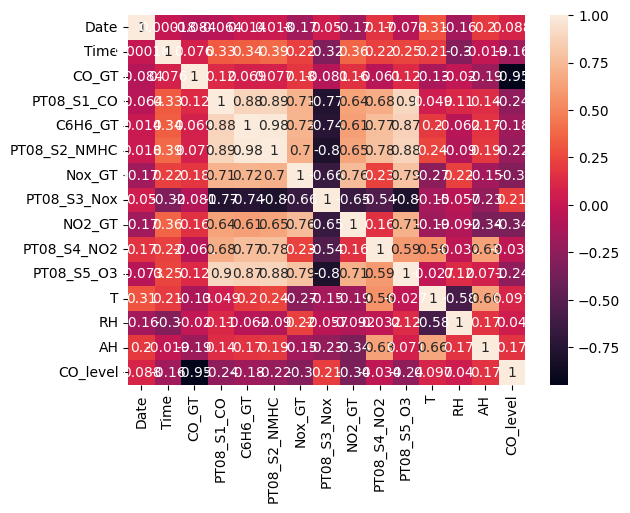

In [67]:
#CORRELATION IN HEATMAP........
sns.heatmap(df.corr(),annot=True)

Applying Logistic Regression


In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [69]:
x_train.isna().sum()


Date               0
Time               0
CO_GT              0
PT08_S1_CO       273
C6H6_GT          273
PT08_S2_NMHC     273
Nox_GT          1234
PT08_S3_Nox      273
NO2_GT          1235
PT08_S4_NO2      273
PT08_S5_O3       273
T                273
RH               273
AH               273
dtype: int64

In [72]:
# fill NaNs in train with column means
x_train = x_train.fillna(x_train.mean())

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=5000)

In [76]:
y_pred = lr.predict(x_test_scaled)


In [77]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9230769230769231


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1467
           1       0.80      0.83      0.81       384
           2       0.00      0.00      0.00        70
           3       0.50      0.67      0.57         3
           4       1.00      1.00      1.00       416

    accuracy                           0.92      2340
   macro avg       0.65      0.69      0.67      2340
weighted avg       0.90      0.92      0.91      2340



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree



In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 0, 0, ..., 1, 4, 0])

In [81]:
#To check the classification report......
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00       384
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00       416

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



Random Forest


In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
rf_pred=rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 1, 4, 0])

In [84]:
#To check the classification report......
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       0.99      1.00      1.00       384
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00       416

    accuracy                           1.00      2340
   macro avg       1.00      0.99      1.00      2340
weighted avg       1.00      1.00      1.00      2340



In [87]:
#now compare the accuracies of these three  machine learning algorithims
from sklearn.metrics import accuracy_score
lr_acc=accuracy_score(y_test,y_pred)
dt_acc=accuracy_score(y_test,dt_pred)
rf_acc=accuracy_score(y_test,rf_pred)
print("accuracy of logistic regression is:-",lr_acc)
print("accuracy of decision tree is:-",dt_acc)
print("accuracy of Random forest is:-",rf_acc)

accuracy of logistic regression is:- 0.9230769230769231
accuracy of decision tree is:- 1.0
accuracy of Random forest is:- 0.9991452991452991


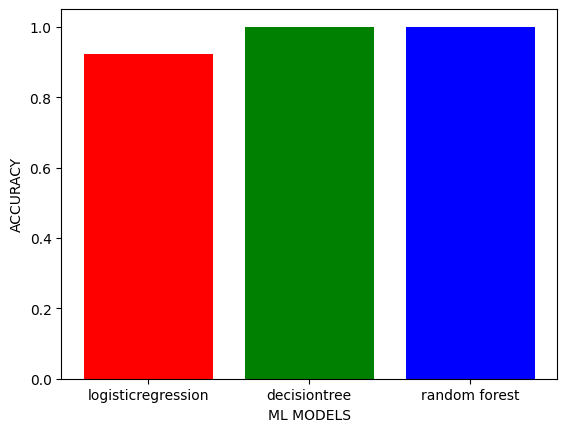

In [88]:
models=["logisticregression","decisiontree","random forest"]
accuracies=[lr_acc,dt_acc,rf_acc]
plt.bar(models,accuracies,color=['red','green','blue'])
plt.xlabel("ML MODELS")
plt.ylabel("ACCURACY")
plt.show()

In [89]:
#out of all three algorithims ,decisiontree works better with great accuracy......
x

Date  Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0      187    19   11.9      2008.0     50.6        1980.0  1389.0   
1      187    20   11.5      1918.0     49.4        1958.0  1358.0   
2      181    18   10.2      1802.0     47.7        1924.0   748.0   
3      187    18   10.2      1982.0     49.5        1959.0  1369.0   
4      190    18   10.1      1956.0     45.2        1877.0  1389.0   
...    ...   ...    ...         ...      ...           ...     ...   
9352   263     4 -200.0       993.0      2.3         604.0    85.0   
9353   269     4 -200.0      1122.0      6.0         811.0   181.0   
9354   275     4 -200.0       883.0      1.3         530.0    63.0   
9355    40     4 -200.0       818.0      0.8         473.0    47.0   
9356    46     4 -200.0       864.0      0.8         478.0    52.0   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0           325.0   220.0       2562.0      2342.0  12.4  74.7  1.0741  
1           335.0   190.0       2477.0      2237.0  11.5  76.2  1.0324  
2           356.0   192.0       2235.0      2452.0  13.7  52.8  0.8244  
3           322.0   227.0       2536.0      2386.0  13.2  72.6  1.0936  
4           347.0   255.0       2338.0      2465.0  15.5  62.8  1.0979  
...           ...     ...          ...         ...   ...   ...     ...  
9352        848.0    65.0       1160.0       762.0  14.5  66.4  1.0919  
9353        641.0    92.0       1336.0      1122.0  16.2  71.2  1.3013  
9354        997.0    46.0       1102.0       617.0  13.7  68.2  1.0611  
9355       1257.0    41.0        898.0       323.0  13.7  48.8  0.7606  
9356       1116.0    43.0        958.0       489.0  11.8  56.0  0.7743  

[9357 rows x 14 columns]

In [90]:
#prediction by decision tree....
predict=dt.predict([[180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919]])
predict

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])

In [91]:
#prediction by Random Forest....
predict=rf.predict([[180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919]])
predict

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4])

In [92]:
#prediction by Logistic Regression....
predict=lr.predict([[180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919]])
predict

array([0])